## HW4_Classification_Search_Optimal_Parameters

##Noah Caulfield<br>
3/27/2024 <br>
For CS 460 at Eastern New Mexico University<br>
Prof. Dr. Edgar Eduardo Ceh Varela <br>


## Objective

### Practice the searching for optimal tuning parameters


### You will practice:
- How can K-fold cross-validation be used to search for an optimal tuning parameter?
- How can this process be made more efficient?
- How do you search for multiple tuning parameters at once?
- What do you do with those tuning parameters before making real predictions?
- How can the computational expense of this process be reduced?

### First, import the required libraries

In [13]:
"""
Import:
- pandas
- sklearn Train-Test split
- sklearn Standard Scaler
- sklearn K Neighbors Classifier
- sklearn Cross val score
- sklearn Grid Search Cross Validation
- matplotlib
"""
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt



# Keep the following lines (you can comment them out to see what happens)
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")



### Read the data. For this exercise we are using the 'winequality-white.csv' file

Note: The path in your drive might change

In [6]:
# Read the content in a df DataFrame using Pandas. Be careful with the separators

# show the first 5 instances
from google.colab import drive
import pandas as pd



# define path
file_path = '/content/drive/MyDrive/winequality-white.csv'

# Read the content into a pandas DataFrame,
df = pd.read_csv(file_path, sep=None, engine='python')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Show the number of rows and columns
# Read the content into a pandas DataFrame, assuming pandas can automatically detect the separator
df = pd.read_csv(file_path, sep=None, engine='python')

# Display the DataFrame's shape directly
print(df.shape)



(4898, 12)


In [17]:
# Show the description of the DataFrame.

# Are there any missing values?


# Read the content into a pandas DataFrame,
df = pd.read_csv(file_path, sep=None, engine='python')

# Display the descriptive summary of the DataFrame in DataFrame format
display(df.describe())

# Check for any missing values in the DataFrame and display the count
missing_values_count = df.isnull().sum()
missing_values_df = missing_values_count[missing_values_count > 0].to_frame(name='Count of Missing Values')

if not missing_values_df.empty:
    print("Missing values per column:")
    display(missing_values_df)
else:
    print("There are no missing values in this DataFrame.")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


There are no missing values in the DataFrame.


### Generate our X and y. y is our column 'quality'

In [38]:
#X will include all columns except 'quality'
X = df.drop('quality', axis=1)

# Y will be the 'quality' column
y = df['quality']

In [39]:
# Display the first few rows of the features
print("First few rows of features (X):")
display(X.head())


First few rows of features (X):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [31]:
# Show the first few rows of the target to verify
#print("First few rows of target (y):")
display(y.head())

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

### Split train and test

In [40]:
# Get X_train, X_test, y_train, and y_test.
# Use a 80-20 split, with random state of 42
# Split the dataset into training and test sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [32]:
# Show the sizes for your datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3918, 11)
(980, 11)
(3918,)
(980,)


### Do you think we need to Standardize X?

In [99]:
# No need to use head() in the formatted_string construction for first 5.
def format_row(row):
    # Split the row into groups of 4 elements
    groups = [row[i:i+4] for i in range(0, len(row), 4)]

    return "\n ".join(" ".join(f"{num:.8e}" for num in group) for group in groups)
# Extract the first five rows as a numpy array
first_five_rows = X_train_scaled_df.head().values



In [47]:
# Show the 5 rows of the scaled dataset
# Construct the formatted string with custom row formatting
formatted_string = "[[" + "]\n [".join(format_row(row) for row in first_five_rows) + "]]"

# Print
print(formatted_string)

[[5.15119310e-01 -1.07623315e+00 2.27730764e-01 3.40419470e-01
 -8.13688488e-01 5.34064605e-01 -6.41932319e-01 -4.47040725e-01
 -3.28261014e-01 -7.02444738e-01 1.54037099e+00]
 [-6.69188091e-01 -2.88776731e-01 8.95831948e-01 1.00207124e+00
 -2.17211567e-01 7.73947112e-01 1.35510550e+00 9.03369755e-01
 -6.18856911e-02 2.66074147e-01 -8.21711966e-01]
 [-1.49820327e+00 4.00247639e-01 -2.28071805e-02 1.84736700e-01
 -4.00742927e-01 -6.05377303e-01 -1.02232048e+00 -4.60280044e-01
 4.04271124e-01 1.93263316e-03 4.81506217e-01]
 [4.13963498e-02 -8.79369048e-01 1.44218115e-01 -9.24503038e-01
 -4.46625767e-01 -1.25612289e-01 -8.79674917e-01 -3.04718052e-01
 1.37895801e-01 4.42168490e-01 2.37152807e-01]
 [9.88842271e-01 2.03383533e-01 -6.07395717e-01 2.43240669e+00
 3.33382515e-01 5.42995912e-02 8.55846045e-01 1.88307932e+00
 7.13019704e-02 8.99798045e-02 -8.86517384e-02]]


### Create a KNN classifier considering just 5 neighbors

In [ ]:
# Define a K Neighbors Classifier with 5 neighbors

from sklearn.neighbors import KNeighborsClassifier

# start K Neighbors Classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

### To train our model, we will use cross-validation using 5 folds for accuracy

In [100]:
# use the cross_val_score() method to train our knn classifier with X_train and y_train
#, and 5 folds. Use accuracy as metric.
# Save the result in a variable scores


from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')

# scores variable now holds the cross-validated scores
#print(scores)
scores_array = np.array(scores)



In [101]:
# print the scores obtained
# Print the scores array in the desired format
# Use repr to get the string representation of the numpy array, ensuring commas are included
scores_str = repr(scores_array)
print("array(" + scores_str[6:] + " ")


array([0.47959184, 0.4744898 , 0.45535714, 0.45849298, 0.47254151]) 


In [56]:
average_accuracy = np.mean(scores)

print(f"Average accuracy: {average_accuracy:}")

Average accuracy: 0.46809465165376496


#### This is the accuracy of our model using 5 neighbors! Can we improve it?

### Let's now search for the optimal value of neighgbors (k)

### Let's use a more efficient parameter tuning using `GridSearchCV`

Allows you to define a grid of parameters that will be searched using K-fold cross-validation

In [59]:
# define the parameter values that should be searched
# We are going to use the same range, from 1 to 31 (inclusive)
# Define a variable to store a list with the range values

k_range = list(range(1, 32))



In [58]:
# Show the list of values
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


### Let's create a parameter grid. In other words, let's map the the parameter names to the values that should be searched


In [60]:
# Define a variable to store the dictionary of parameters
# The parameter is the number of neighbors mapped to the list of
#values we obtained previously

# show your dictionary of parameters
param_grid = {'n_neighbors': k_range}

print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]}


In [61]:

from sklearn.neighbors import KNeighborsClassifier

# Instantiate a new KNN model without any parameters
knn = KNeighborsClassifier()

### Instantiate a GridSearchCV object

In [68]:
# Use as parameters the following:
# knn model,
# the dictionary of parameters,
# the number of folds (5),
# 'accuracy' as the metric
# In addition, you can use the parameter n_jobs=-1 to run the computations in parallel (if supported by your OS)


from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': list(range(1, 32))}

# Instantiate the KNN model without any parameters
knn = KNeighborsClassifier()

# Setup GridSearchCV with the specified parameters and model
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)



In [73]:
# show the object created
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

### Let's train the grid with our X_train and y_train data

In [64]:
# use the object to train with X_train and y_train
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

### Let's view the results.

We can create a Pandas DataFrame using the output of the cv_results_ as input for our DataFrame

In [75]:

from IPython.display import display


# Convert the cv_results_ to a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Select specific columns: 'mean_test_score', 'std_test_score', and 'params'
selected_columns_df = results_df[['mean_test_score', 'std_test_score', 'params']]

display(selected_columns_df)

,mean_test_score,std_test_score,params
0,0.545685,0.008051,{'n_neighbors': 1}
1,0.486729,0.018125,{'n_neighbors': 2}
2,0.468358,0.016629,{'n_neighbors': 3}
3,0.469377,0.009407,{'n_neighbors': 4}
4,0.468095,0.009458,{'n_neighbors': 5}
5,0.466822,0.005355,{'n_neighbors': 6}
6,0.464265,0.007483,{'n_neighbors': 7}
7,0.457890,0.008705,{'n_neighbors': 8}
8,0.468353,0.011294,{'n_neighbors': 9}
9,0.459169,0.013004,{'n_neighbors': 10}


In [77]:
# Extract the array of mean test scores
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Store the results in a variable
mean_scores_variable = mean_test_scores

# Print the variable
print(mean_scores_variable)

[0.54568542 0.48672916 0.4683579  0.46937668 0.46809465 0.4668224
 0.46426519 0.45788959 0.46835334 0.45916934 0.46401139 0.45916087
 0.46017965 0.46349825 0.46681654 0.46528266 0.45839426 0.45890511
 0.45865262 0.46171221 0.46094593 0.46017899 0.45533075 0.46196569
 0.45583802 0.45787884 0.46196504 0.46400553 0.4622234  0.46809205
 0.46069213]


### Let's visualize the scores

Text(0, 0.5, 'Cross-Validated Accuracy')

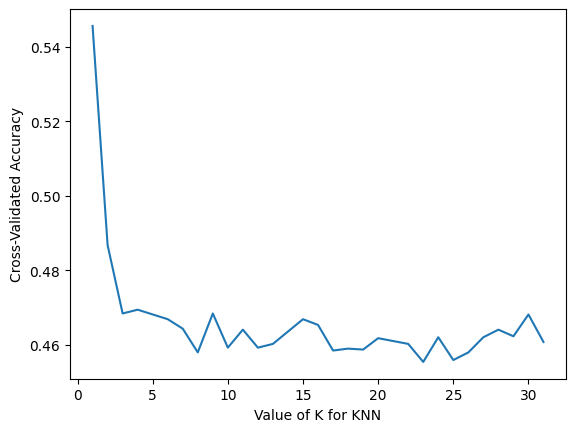

In [80]:
# plot the results
grid_mean_scores = mean_scores_variable; #correct name for passing from prior name instantiation
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Finally, get the parameter for the best model

In [82]:
# Print the best score from the grid search
best_score = grid_search.best_score_
print("Best Score:", best_score)

# Print the best parameter combination found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Print the best estimator
best_estimator = grid_search.best_estimator_
print("Best Estimator:", best_estimator)


Best Score: 0.5456854197617744
Best Parameters: {'n_neighbors': 1}
Best Estimator: KNeighborsClassifier(n_neighbors=1)


### We improved our model by searching the best k for the neighbors!

### But, what would happen if our model has more parameters? Let's see how we can search the best combination of parameters

### Searching multiple parameters simultaneously


#### First, let's define the parameter values that should be searched

In [102]:
# define the parameter values that should be searched
# As before, define a list for the range of neighbors, from 1 to 31 (inclusive)


# define a list for the weight options ('uniform' and 'distance')
###########################################
# Range of neighbors
k_range = list(range(1, 32))

# Weight options
weight_options = ['uniform', 'distance']



### Create a parameter grid. For that, we need to map the parameter names to the values that should be searched

In [103]:
# Create a dictionary mapping the parameters to a key
# You can see the parameter here:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


# Create the parameter grid
param_grid = {'n_neighbors': k_range,
              'weights': weight_options}

# print the content of the grid dictionary
print(param_grid)


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 'weights': ['uniform', 'distance']}


### Instantiate and train the grid

In [89]:
# As before, we use a vanilla knn model, the dictionay of parameters, 5 folds, and accuracy as the score

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the vanilla KNN model
knn = KNeighborsClassifier()

# Define the parameter values that should be searched
k_range = list(range(1, 32))
weight_options = ['uniform', 'distance']
param_grid = {'n_neighbors': k_range, 'weights': weight_options}

# Instantiate GridSearchCV with the KNN model and the dictionary of parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

### As before, let's create a pandas dataframe to see the results

In [91]:
# view the results


from IPython.display import display


# Convert the cv_results_ to a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Select specific columns: 'mean_test_score', 'std_test_score', and 'params'
selected_columns_df = results_df[['mean_test_score', 'std_test_score', 'params']]

display(selected_columns_df)

,mean_test_score,std_test_score,params
0,0.545685,0.008051,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.545685,0.008051,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.486729,0.018125,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.545685,0.008051,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.468358,0.016629,"{'n_neighbors': 3, 'weights': 'uniform'}"
...,...,...,...
57,0.591881,0.008306,"{'n_neighbors': 29, 'weights': 'distance'}"
58,0.468092,0.020879,"{'n_neighbors': 30, 'weights': 'uniform'}"
59,0.593667,0.011521,"{'n_neighbors': 30, 'weights': 'distance'}"
60,0.460692,0.020216,"{'n_neighbors': 31, 'weights': 'uniform'}"


### Examine the best model

In [93]:


# Directly print the best score and best parameters from the grid_search object
print(grid_search.best_score_)
print(grid_search.best_params_)



0.5936667578908958
{'n_neighbors': 30, 'weights': 'distance'}


## Wow! We have improved more our model!

### Now you can use those parameters to train a model for predictions using the test dataset



In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)  # Use X_test directly

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the final model on the test dataset: {accuracy}")


Accuracy of the final model on the test dataset: 0.4826530612244898


## What is the accuracy of your final model using the test dataset?

### Write the code for getting that result and answer the following questions
#### - Does the model prsents overfitting?

Yes, the model does present some overfitting, which is specifically demonstrated by the accuracy of the final model within the test dataset, compared to the best score found above. If the model performs significantly better on the training dataset than on the test dataset, it may indicate overfitting. Overfitting occurs when the model learns the training data too well, including its noise and outliers, making it perform poorly on unseen data. In total the model is relatively in line, however I do feel as though there are some instances of overfitting.
#### - What could you test to improve your model?

Additional data can always help to strengthen and improve a model- including this one. Hyperparameter tuning can be helpful. Also further addressment of the complexity of the problem/model along with the implementation of different algorithms may be helpful.

#### - Is accuracy the best metric for this problem? Yes/No and why?

Accuracy is a valid and acceptable metric for this sort of problem, as the "Correctness" of said problem is based on the analysis of the 1-9 input variables per wine type/name. However, the validity of these input variables may be seen as subjective, and the accuracy of identification is contingent concluding with the correct figures/metrics and them being accurately compared. Also, the larger the dataset gets, the harder this level of "Accuracy" will be able to predict- due to crossings within certain identifiable thresholds.   

## Note: There is another method called `RandomizedSearchCV` which randomly searches a subset of parametes. You can play with this method to see the differences.

This is the end of this assignment